In [ ]:
# CS 237 Spring 2019
# Author: Alina Ene (aene@bu.edu)
# Used in L20

# CS 237: Double Sixes 

In this notebook, we consider the following experiment:

> <b>Experiment</b>: We repeatedly roll a fair 6-sided die until we get a pair of consecutive sixes for the first time. The rolls are independent.

We are interested in the <b>expectation</b> of the following random variable:

> X = number of rolls we perform

## To be or not to be (geometric)

What is the distribution of X? On a first glance, it has the flavor of a geometric random variable. One reasoning could be the following:

- Define a trial to be two consecutive rolls
- A trial is a success if the two consecutive rolls are 66
- Pr(success) = 1/36, since the die is 6-sided and fair, and the rolls are independent
- The total number of rolls we perform until 66 is equal to the total number of trials until the first success
- Therefore X ~ Geometric(1/36) and thus Ex(X) = 36

<b>Think</b>: Do you agree with the above argument?

## Simulation

Let us do the simulation and see what we get. The code below estimates Ex(X).

In [1]:
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt
plt.style.use('seaborn')

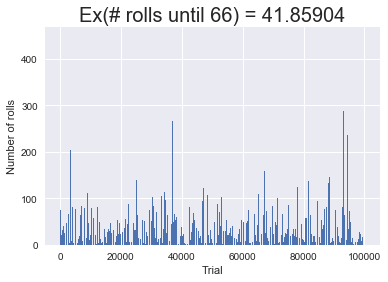

In [2]:
# simulation for the double sixes experiment
# a single experiment
def single_trial():
    prev_roll = randint(1, 7) # fair 6-sided die roll
    num_rolls = 1
    while True:
        curr_roll = randint(1, 7) 
        num_rolls = num_rolls + 1
        if prev_roll == 6 and curr_roll == 6:
            return num_rolls
        prev_roll = curr_roll
    return num_rolls

# perform N trials
N = 100000
rolls = []
trial = [i + 1 for i in range(N)]
for i in range(N):
    num_rolls = single_trial()
    rolls.append(num_rolls)

avg_rolls = sum(rolls)
avg_rolls = avg_rolls / N
plt.bar(trial,rolls)
plt.xlabel("Trial")
plt.ylabel("Number of rolls")
plt.title("Ex(# rolls until 66) = "  + str(avg_rolls),fontsize=20)
plt.show()

## Where is the mistake?

The simulation says the expectation is about 42, whereas the above argument says it is 36. So there are two possibilities:

- There is a mistake in the code
- There is a mistake in the above argument

The code seems simple enough and correct enough. So maybe the above argument is worth taking a closer look. Indeed, as we have seen in class, a Geometric(p) random variable counts the number of independent trials until the first success, where p is the probability that a single trial is a success. The above reasoning argues (correctly) that X is the number of trials until the first success, where Pr(success) = 1/36. But it does not argue that the trials are independent!

Are the trials independent? Consider the first two trials: the first trial is rolls 1 and 2, and the second trial is rolls 2 and 3. Since the two trials share the second roll of the die, they are dependent.

Therefore the conclusion of the above argument does not follow.

## The math (optional)

The random variable X is not geometric. The trials as defined earlier (trial = two consecutive rolls) are not independent, since two consecutive trials share a roll, but trials that are farther apart are independent. So perhaps we can still use the ideas we developed for the geometric distribution, but apply them with a bit of care. As we now illustrate, this is indeed the case: we will use the ideas from lecture to break down the expectation. The event of interest now is whether the first two rolls were sixes.

Let
- $S_1$ = first roll is a 6
- $S_2$ = second roll is a 6

Also, for notational convenience, let $p = \frac{1}{6}$ and $q = \frac{5}{6}$.

Since the events $\overline{S}_2$, $S_2 \cap S_1$, and $S_2 \cap \overline{S}_1$ form a partition of the sample space, the law of total Ex gives us that:

$$
\begin{align*}
\mathrm{Ex}(X) &= \mathrm{Ex}(X | \overline{S}_2) \Pr(\overline{S}_2) + \mathrm{Ex}(X | S_2 \cap S_1) \Pr(S_2 \cap S_1) + \mathrm{Ex}(X | S_2 \cap \overline{S}_1) \Pr(S_2 \cap \overline{S}_1)\\
&= \mathrm{Ex}(X | \overline{S}_2) \cdot q + \mathrm{Ex}(X | S_2 \cap S_1) \cdot p^2 + \mathrm{Ex}(X | S_2 \cap \overline{S}_1) \cdot pq
\end{align*}
$$

Now we consider each conditional expectation in turn. As in class, the key will be the fact that the process is memoryless about what happened in the past, provided that the past is not so recent. More precisely, we only need to remember whether the previous roll was a 6 or not, since the outcomes of the rolls that were further in the past do not affect the number of rolls we will need from this point onward. With this observation in mind, we have

$$
\begin{align*}
\mathrm{Ex}(X | \overline{S}_2) &= 2 + \mathrm{Ex}(X)\\
\mathrm{Ex}(X | S_2 \cap S_1) & = 2\\
\mathrm{Ex}(X | S_2 \cap \overline{S}_1) &= 1 + \mathrm{Ex}(X | S_1)
\end{align*}
$$

The formal argument for the above identities is similar to what we saw in lecture, and it is left as an exercise.

We still have $\mathrm{Ex}(X | S_1)$ to contend with. We can break it down based on $S_2$:
$$
\begin{align*}
\mathrm{Ex}(X | S_1) &= \mathrm{Ex}(X | S_1 \cap S_2) \Pr(S_2) + \mathrm{Ex}(X | S_1 \cap \overline{S}_2) \Pr(\overline{S}_2)\\
&= 2p + (2 + \mathrm{Ex}(X)) q\\
&= 2 + \mathrm{Ex}(X) \cdot q
\end{align*}
$$

Putting everything together, we obtain:
$$
\mathrm{Ex}(X) = (2 + \mathrm{Ex}(X)) q + 2p^2 + (3 + \mathrm{Ex}(X) q) pq
$$
By solving for $\mathrm{Ex}(X)$ in the above equation, we obtain:
$$
\mathrm{Ex}(X) = \frac{2q + 2p^2 + 3pq}{1 - q - pq^2}
= \frac{2 \cdot \frac{5}{6} + 2 \cdot \frac{1}{36} + 3 \cdot \frac{5}{36}}{1 - \frac{5}{6} - \frac{1}{6} \cdot \frac{25}{36}}
= 42
$$

Recall that the simulation gave us an empirical expectation of approximately 42.